In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [2]:
clf = RandomForestClassifier(n_estimators=200, min_samples_split=1)

digits = load_digits(10)

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target.shape

(1797,)

In [11]:
data_train, data_test, label_train, label_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

In [12]:
clf.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
label_predict = clf.predict(data_test)

In [14]:
print confusion_matrix(label_test, label_predict)

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  1  0  0  2  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  2  0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  1  0 46]]


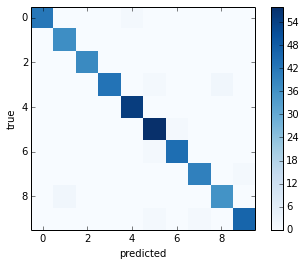

In [15]:
plt.imshow(confusion_matrix(label_test, label_predict),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [16]:
accuracy_score(label_test, label_predict)

0.97555555555555551

# Using the data from kaggle.com

In [31]:
dataset = pd.read_csv('train.csv')
target = dataset[[0]].values.ravel()
pixels = dataset.iloc[:,1:].values

In [32]:
pixels_train, pixels_test, target_train, target_test = train_test_split(pixels, target, test_size=0.50)

In [33]:
clf.fit(pixels_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
target_predict = clf.predict(pixels_test)

In [35]:
confusion_matrix(target_test, target_predict)

array([[1997,    0,    3,    2,    3,    2,    8,    0,   12,    0],
       [   0, 2251,   13,    7,    5,    2,    4,    4,    3,    3],
       [  10,    5, 1997,   10,   11,    1,    6,   21,   12,    6],
       [   3,    5,   42, 2047,    2,   29,    5,   12,   28,   11],
       [   3,    3,    6,    0, 1963,    0,   13,    4,    1,   40],
       [   7,    5,    1,   38,    1, 1795,   11,    4,   14,   14],
       [  14,    4,    1,    0,    6,   17, 2023,    0,    8,    0],
       [   6,   14,   24,    5,   14,    0,    0, 2153,    8,   25],
       [   2,    9,   12,   21,   11,   15,   11,    0, 1912,   30],
       [  16,    6,    5,   32,   25,    5,    1,   22,   12, 2026]])

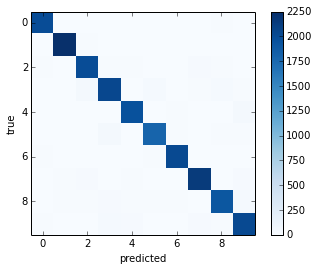

In [36]:
plt.imshow(confusion_matrix(target_test, target_predict), cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [37]:
accuracy_score(target_test, target_predict)

0.96019047619047615